<a href="https://colab.research.google.com/github/Satyamaadi/python/blob/master/Cartoonize_using_OpenCV4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import matplotlib.pyplot as plt

In [22]:
def show_with_matplotlib(color_img,title,pos):
  img_rgb = color_img[:,:,::-1]
  ax = plt.subplot(2,4,pos)
  plt.imshow(color_img)
  plt.title(title)
  plt.axis('off')

In [4]:
def sketch_image(img):
  img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_gray = cv2.medianBlur(img_gray,5)
  edges = cv2.Laplacian(img_gray,cv2.CV_8U,ksize=5)
  ret,threshold = cv2.threshold(edges,70,255,cv2.THRESH_BINARY_INV)
  return threshold

In [5]:
def cartonize_image(img, gray_mode=False):
    thresholded = sketch_image(img)
    filtered = cv2.bilateralFilter(img, 10, 250, 250)
    cartoonized = cv2.bitwise_and(filtered, filtered, mask=thresholded)

    if gray_mode:
        return cv2.cvtColor(cartoonized, cv2.COLOR_BGR2GRAY)

    return cartoonized


In [23]:
plt.figure(figsize=(20, 26))
plt.suptitle("Cartoonizing images", fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Cartoonizing images')

<Figure size 1440x1872 with 0 Axes>

In [7]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Image_created_with_a_mobile_phone.png/220px-Image_created_with_a_mobile_phone.png

--2021-01-25 05:39:36--  https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Image_created_with_a_mobile_phone.png/220px-Image_created_with_a_mobile_phone.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64339 (63K) [image/png]
Saving to: ‘220px-Image_created_with_a_mobile_phone.png’

220px-Image_created 100%[===================>]  62.83K  --.-KB/s    in 0.009s  

2021-01-25 05:39:36 (6.51 MB/s) - ‘220px-Image_created_with_a_mobile_phone.png’ saved [64339/64339]



In [8]:
image = cv2.imread('220px-Image_created_with_a_mobile_phone.png')

In [9]:
type(image)

numpy.ndarray

In [10]:
custom_sketch_imge = sketch_image(image)

In [11]:
custom_cartoonised_image = cartonize_image(image)

In [12]:
custom_cartoonised_image_gray = cartonize_image(image,True)

In [13]:
sketch_gray, sketch_color = cv2.pencilSketch(image, sigma_s=30, sigma_r=0.1, shade_factor=0.1)
stylizated_image = cv2.stylization(image, sigma_s=60, sigma_r=0.07)

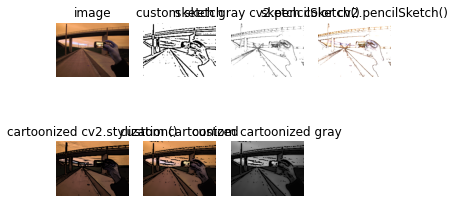

In [24]:
show_with_matplotlib(image, "image", 1)
show_with_matplotlib(cv2.cvtColor(custom_sketch_imge, cv2.COLOR_GRAY2BGR), "custom sketch", 2)
show_with_matplotlib(cv2.cvtColor(sketch_gray, cv2.COLOR_GRAY2BGR), "sketch gray cv2.pencilSketch()", 3)
show_with_matplotlib(sketch_color, "sketch color cv2.pencilSketch()", 4)
show_with_matplotlib(stylizated_image, "cartoonized cv2.stylization()", 5)
show_with_matplotlib(custom_cartoonised_image, "custom cartoonized", 6)
show_with_matplotlib(cv2.cvtColor(custom_cartoonised_image_gray, cv2.COLOR_GRAY2BGR), "custom cartoonized gray", 7)